## 1- Cargar los datos

In [1]:
import pandas as pd
from funpymodeling import status, freq_tbl
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)
data

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [3]:
data.head(3)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


In [4]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


## 2- Preparación de los datos

In [5]:
data = data.drop("X1", axis=1)

In [6]:
data.head(5)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


## 3- AED y storytellings

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

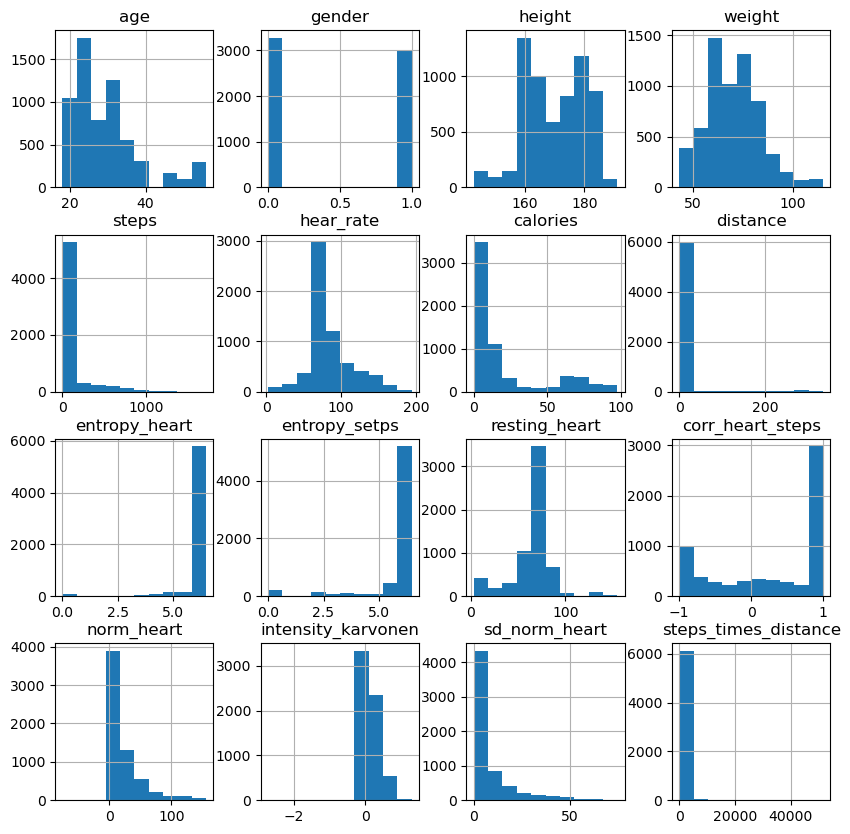

In [7]:
data.hist(figsize=(10,10))

In [8]:
len(data)

6264

In [9]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
filtered_data = pd.get_dummies(data)

In [11]:
filtered_data.head(5)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,sd_norm_heart,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,1.000000,0.089692,True,False,True,False,False,False,False,False
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,1.000000,0.102088,True,False,True,False,False,False,False,False
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,1.000000,0.115287,True,False,True,False,False,False,False,False
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,1.000000,0.129286,True,False,True,False,False,False,False,False
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.241567,0.144088,True,False,True,False,False,False,False,False


In [12]:
status(filtered_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


## 4- Clustering con K-means

### 4.1- Normalización de datos

In [13]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filtered_data)
x_data_norm = std_scaler.transform(filtered_data)

pd.DataFrame(x_data_norm).describe().T

,count,mean,std,min,25%,50%,75%,max
0,6264.0,2.268655e-17,1.00008,-1.252603,-0.691327,-0.130051,0.431226,3.013097
1,6264.0,2.177909e-16,1.00008,-0.954117,-0.954117,-0.954117,1.048090,1.048090
2,6264.0,-5.172533e-16,1.00008,-2.587115,-0.940447,-0.165544,0.996811,2.062302
3,6264.0,3.720594e-16,1.00008,-1.978652,-0.714787,-0.120027,0.571381,3.374187
4,6264.0,1.814924e-16,1.00008,-0.487307,-0.468636,-0.446495,-0.016676,7.201889
5,6264.0,9.074620e-17,1.00008,-2.929548,-0.368087,-0.309803,0.332568,3.776815
6,6264.0,1.814924e-16,1.00008,-0.710995,-0.686108,-0.566576,0.037652,2.857381
7,6264.0,-1.814924e-17,1.00008,-0.301105,-0.300699,-0.297159,0.040590,6.991359
8,6264.0,-9.165366e-16,1.00008,-7.877479,0.102167,0.208370,0.284271,0.581857
9,6264.0,7.985665e-16,1.00008,-4.569150,0.134891,0.332110,0.404334,0.585672


### 4.2- Creación del modelo

In [14]:
from sklearn.cluster import KMeans

cluster_model = KMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=100,
    random_state=0,
    n_init="auto"
)

cluster_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [15]:
pred_cluster = cluster_model.predict(x_data_norm)

pred_cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

### 4.3- Cantidad de clusters

In [16]:
cluster_model

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [17]:
from copy import deepcopy

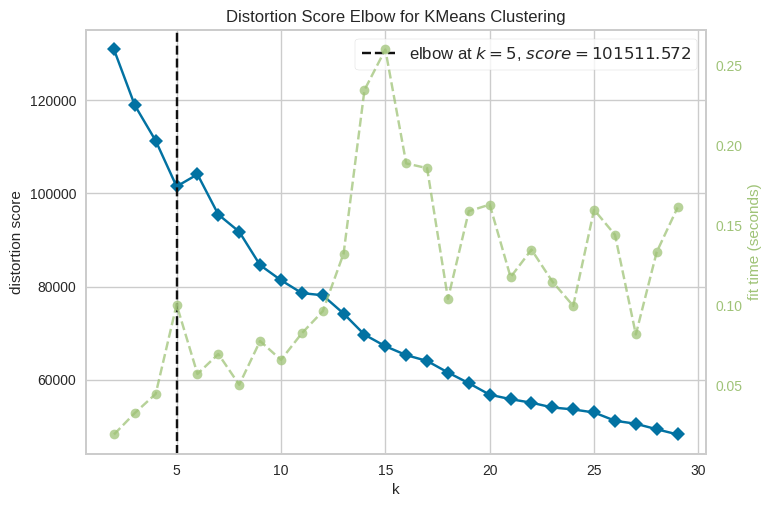

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [18]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cluster_model2 = deepcopy(cluster_model)

kelbow_visualizer(cluster_model2, x_data_norm, k=(2,30),locate_elbow=True)

### 4.4- Gráfico de coordenadas

In [19]:
cluster_Var = "cluster"
x_data_cluster=filtered_data.copy()
x_data_cluster[cluster_Var]=cluster_model.predict(x_data_norm)

In [20]:
x_data_cluster.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.089692,True,False,True,False,False,False,False,False,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.102088,True,False,True,False,False,False,False,False,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.115287,True,False,True,False,False,False,False,False,0
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.129286,True,False,True,False,False,False,False,False,0
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.144088,True,False,True,False,False,False,False,False,0


In [21]:
from funpymodeling.model_validation import coord_plot

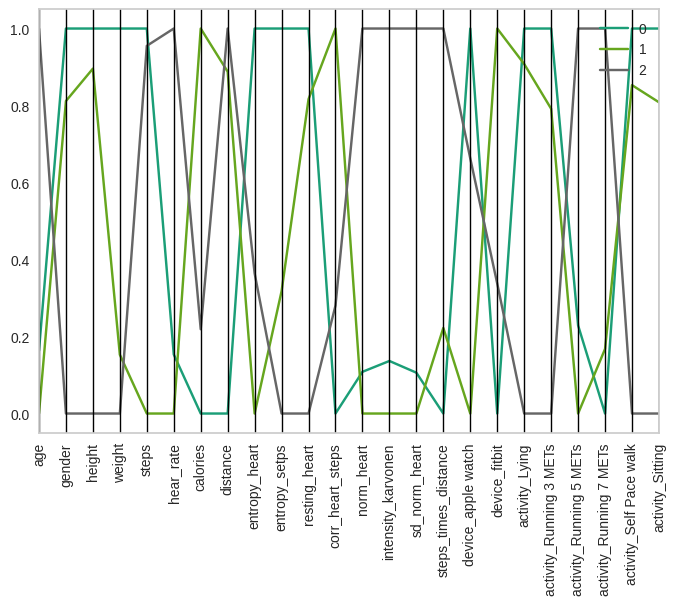

In [22]:
d_orig,d_transf = coord_plot(x_data_cluster, cluster_Var)

#### Observaciones:
 1. 
 2. 

In [23]:
d_orig

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,29.135856,0.498449,170.238120,70.964981,172.581237,83.894461,6.474402,0.107200,6.125479,6.068143,...,39.516011,0.996588,0.003412,0.245968,0.177109,0.160050,0.092742,0.158499,0.165633,0
1,29.004221,0.475306,169.861925,68.288772,8.046306,73.317839,38.834318,27.621903,5.912248,5.455012,...,679.700168,0.000000,1.000000,0.229211,0.148586,0.154918,0.176446,0.143520,0.147320,1
2,29.812221,0.375559,166.627273,67.805961,165.178001,142.220359,13.561145,31.095708,5.989909,5.169364,...,2918.586318,0.660209,0.339791,0.064083,0.040238,0.177347,0.591654,0.056632,0.070045,2


In [24]:
d_transf

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,0.162915,1.000000,1.000000,1.000000,1.000000,0.153501,0.000000,0.0000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.228803,0.000000,1.000000,1.000000,0
1,0.000000,0.811677,0.895815,0.152835,0.000000,0.000000,1.000000,0.8879,0.000000,0.317818,...,0.222358,0.000000,1.000000,0.907869,0.791604,0.000000,0.167773,0.852962,0.808415,1
2,1.000000,0.000000,0.000000,0.000000,0.955005,1.000000,0.218998,1.0000,0.364211,0.000000,...,1.000000,0.662469,0.337531,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2


### 4.5- Scatter 3D

In [25]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


In [26]:
data2 = data.sample(n=300)

In [27]:
import plotly.express as px

fig = px.scatter_3d(data2,x="gender",y="age",z="calories",color="activity")
fig.show()

## 5- Clustering con HDBSCAN

### 5.1- Creación del modelo

In [28]:
import hdbscan

In [29]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(filtered_data)

HDBSCAN()

In [30]:
model_hdb.labels_

array([195, 195, 195, ...,  87,  87,  87])

In [31]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype("str"))

,0,frequency,percentage,cumulative_perc
0,-1,2675,0.427043,0.427043
1,160,73,0.011654,0.438697
2,116,73,0.011654,0.450351
3,127,67,0.010696,0.461047
4,201,63,0.010057,0.471105
...,...,...,...,...
223,143,5,0.000798,0.996807
224,39,5,0.000798,0.997605
225,16,5,0.000798,0.998404
226,167,5,0.000798,0.999202


### 5.2- Tuning de HDBSCAN

In [32]:
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(filtered_data)

In [33]:
freq_tbl(model_hdb2.labels_.astype("str"))

,0,frequency,percentage,cumulative_perc
0,-1,3380,0.539591,0.539591
1,1,1483,0.23675,0.776341
2,2,1227,0.195881,0.972222
3,0,174,0.027778,1.0


### 5.3- Análisis del modelo

In [34]:
cluster_Var="cluster"
x_data_cluster=filtered_data.copy()
x_data_cluster[cluster_Var] = model_hdb2.labels_

In [35]:
x_data_cluster.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.089692,True,False,True,False,False,False,False,False,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.102088,True,False,True,False,False,False,False,False,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.115287,True,False,True,False,False,False,False,False,1
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.129286,True,False,True,False,False,False,False,False,1
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.144088,True,False,True,False,False,False,False,False,1


In [36]:
x_data_cluster = x_data_cluster[x_data_cluster["cluster"] != -1]

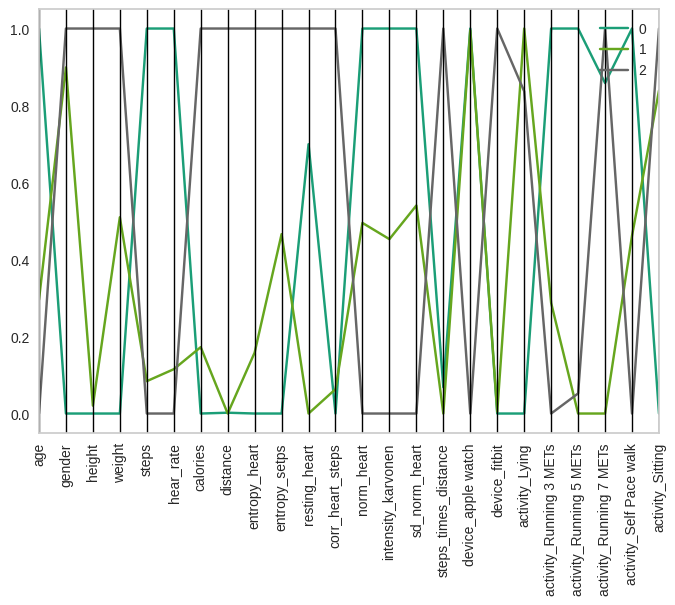

In [37]:
from funpymodeling.model_validation import coord_plot

d_orig, d_transf = coord_plot(x_data_cluster,cluster_Var)

In [38]:
d_orig

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,31.080460,0.293103,169.535632,68.191954,112.857903,99.400448,2.749805,0.061978,6.147160,5.978724,...,6.961329,1.00000,0.00000,0.017241,0.298851,0.304598,0.120690,0.224138,0.034483,0
1,28.429535,0.530007,169.607755,69.922454,15.159899,79.497681,8.809053,0.028732,6.164871,6.109383,...,0.377174,0.99528,0.00472,0.257586,0.200270,0.157788,0.051922,0.189481,0.142953,1
2,27.318663,0.556642,173.052078,71.586308,6.192562,76.908924,37.879381,15.658552,6.259123,6.259123,...,96.667923,0.00000,1.00000,0.218419,0.160554,0.165444,0.132029,0.159739,0.163814,2


In [39]:
d_transf

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,1.000000,0.000000,0.00000,0.000000,1.00000,1.000000,0.000000,0.002127,0.000000,0.000000,...,0.068378,1.00000,0.00000,0.000000,1.000000,1.000000,0.858444,1.000000,0.000000,0
1,0.295303,0.898931,0.02051,0.509817,0.08407,0.115099,0.172483,0.000000,0.158186,0.465974,...,0.000000,0.99528,0.00472,1.000000,0.287177,0.000000,0.000000,0.461835,0.838703,1
2,0.000000,1.000000,1.00000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.00000,1.00000,0.837038,0.000000,0.052149,1.000000,0.000000,1.000000,2


In [40]:
freq_tbl(x_data_cluster["cluster"])

'No categorical variables to analyze.'

### 5.4- Sanity Check

In [41]:
data_check = data.copy()
data_check["cluster"] = model_hdb2.labels_

In [42]:
data_check.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying,1
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying,1
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying,1


### 5.5- Calculo de Silhouette

In [43]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(filtered_data, model_hdb2.labels_)

In [44]:
sil_avg

-0.21245811607860937

In [45]:
sample_silhouette_values = silhouette_samples(filtered_data, model_hdb2.labels_)

In [46]:
sample_silhouette_values

array([ 0.68584835,  0.69083926,  0.69524082, ..., -0.94444757,
       -0.94444757, -0.94444757])

In [47]:
res_sil = pd.DataFrame({"sil_value": sample_silhouette_values, "cluster": model_hdb2.labels_})

/home/alumni/anaconda3/envs/bootcamp_venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/alumni/anaconda3/envs/bootcamp_venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

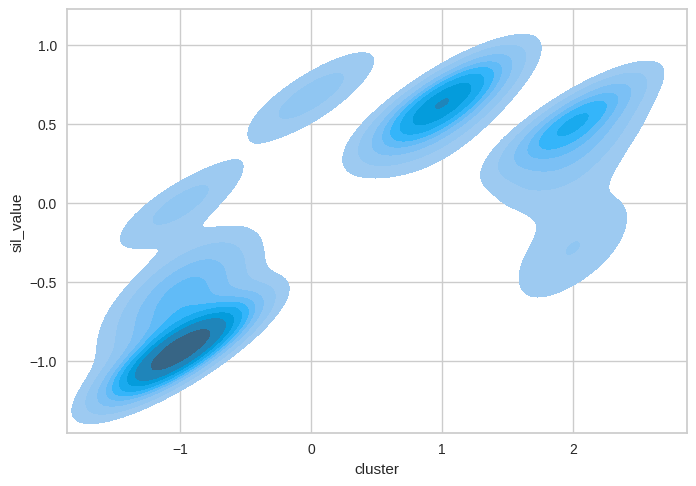

In [48]:
sns.kdeplot(data=res_sil, x="cluster", y="sil_value", fill=True)

<Axes: xlabel='cluster', ylabel='sil_value'>

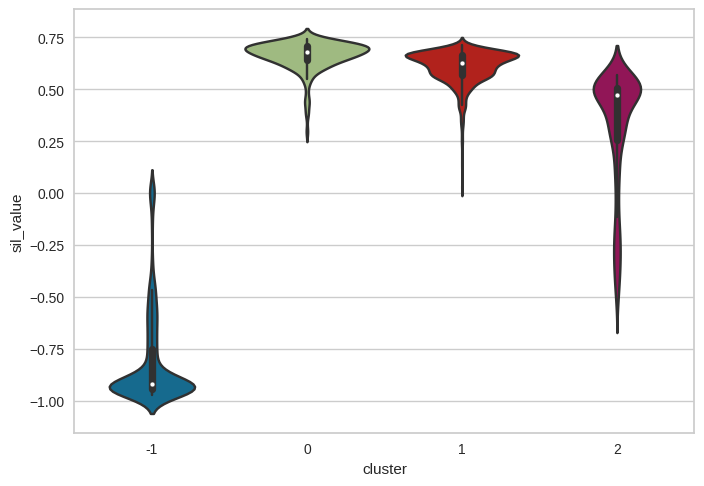

In [49]:
sns.violinplot(data=res_sil, x="cluster", y="sil_value", fill=True)

/home/alumni/anaconda3/envs/bootcamp_venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/alumni/anaconda3/envs/bootcamp_venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

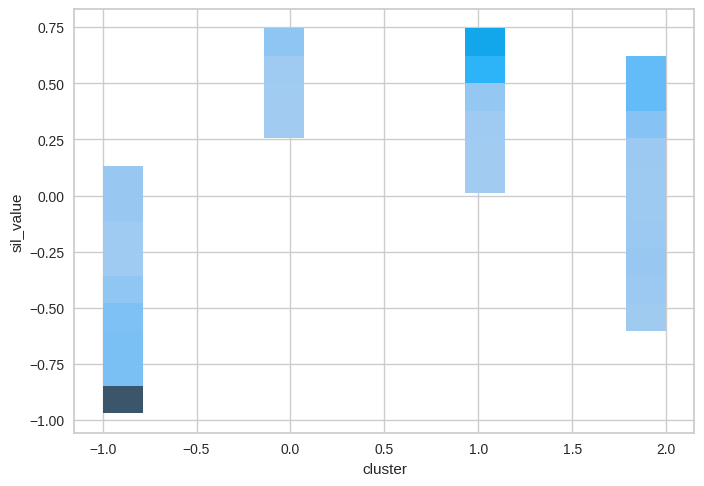

In [50]:
sns.histplot(data=res_sil, x="cluster", y="sil_value", fill=True)

In [51]:
res_sil.groupby("cluster").mean("sil_value")

,sil_value
cluster,
-1,-0.808922
0,0.663534
1,0.607415
2,0.315458
